In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

def convert_df_to_float(df, year_col = 'year'):
    for col in df.columns:
        if col != year_col:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        else:
            df[col] = pd.to_numeric(df[col], errors='coerce').astype(int)
    return df


C:\Users\mateo\miniconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\mateo\miniconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\mateo\miniconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## TG General

In [2]:
tg_tot_df_raw = pd.read_excel( '../data/arg/TG General. 1993 - 2021. 18102022.xlsx',
                   sheet_name='TG',
                  skiprows=5)

def delete_unnamed_cols(tg_tot_df_raw):
    # Get a list of column names that don't start with 'Unnamed:'
    columns_to_keep = [col for col in tg_tot_df_raw.columns if not col.startswith('Unnamed:')]

    # Create a new DataFrame with only the selected columns
    tg_tot_df_raw = tg_tot_df_raw[columns_to_keep]
    
    return tg_tot_df_raw

tg_tot_df_raw = delete_unnamed_cols(tg_tot_df_raw)

In [3]:
vars_y_units = pd.DataFrame(tg_tot_df_raw.iloc[ 0, :])
vars_y_units

,0
Años,NaN
PBI,PBI - M$ Corrientes - Base 2004 - INDEC. Revis...
Masa salarial,Costo laboral consumido. Millones de pesos. JI...
Consumo maquinaria,IBIF Maquinaria a Precios Constantes. Total ec...
Consumo construccion,IBIF Construccion a Precios Constantes. Total ...
Ganancia,NaN
Años.1,NaN
Ganado,Empalme serie JIC - Coremberg hasta 2003 por a...
K Fijo Maquinaria,IBIF Maquinaria a Precios Constantes. Total ec...
K fijo Construcciones,IBIF Construccion a Precios Constantes. Total ...


In [4]:
tg_tot_df = tg_tot_df_raw.iloc[ 1:, :]
tg_tot_df = tg_tot_df.loc[ :, :'Total.2']
tg_tot_df.dropna(subset = ['Años', 'Años.1', 'Años.2','Años.3','Años.4','Años.5' ], inplace = True)

# Get a list of column names that do not start with 'Año'
columns_to_convert_to_float = [col for col in tg_tot_df.columns if not col.startswith('Año')]
columns_to_convert_to_int = [col for col in tg_tot_df.columns if col.startswith('Año')]

## Convert selected columns to float
tg_tot_df[columns_to_convert_to_float] = tg_tot_df[columns_to_convert_to_float].astype(float)

## Convert selected columns to integer
tg_tot_df[columns_to_convert_to_int] = tg_tot_df[columns_to_convert_to_int].astype(int)


tg_tot_df.tail()
# tg_tot_df.info()

,Años,PBI,Masa salarial,Consumo maquinaria,Consumo construccion,Ganancia,Años.1,Ganado,K Fijo Maquinaria,K fijo Construcciones,...,Masa salarial.2,Consumo maquinaria .2,Consumo construccion .2,Ganancia.2,Años.5,K Fijo Maquinaria.2,K fijo Construcciones.2,Kc circulante adelantado.2,Kv circulante adelantado.2,Total.2
25,2017,8.993361e+06,5.101322e+06,3.882507e+05,6.153453e+05,2.888443e+06,2017,214017.916499,5.289351e+06,1.860989e+07,...,0.567232,0.043171,0.068422,0.321175,2017,0.195066,0.686313,0.067480,0.043249,1.0
26,2018,1.247812e+07,6.522551e+06,5.766886e+05,8.981409e+05,4.480743e+06,2018,383977.846244,7.835071e+06,2.703383e+07,...,0.522719,0.046216,0.071977,0.359088,2018,0.198937,0.686403,0.066839,0.038071,1.0
27,2019,1.809082e+07,9.353925e+06,1.008047e+06,1.377187e+06,6.351658e+06,2019,551407.388792,1.326129e+07,4.118261e+07,...,0.517054,0.055721,0.076126,0.351098,2019,0.217155,0.674370,0.064234,0.035212,1.0
28,2020,2.273594e+07,1.162315e+07,1.682939e+06,1.955341e+06,7.474513e+06,2020,828785.817659,2.155108e+07,5.770928e+07,...,0.511224,0.074021,0.086002,0.328753,2020,0.245629,0.657744,0.056727,0.030454,1.0
29,2021,3.851412e+07,1.951198e+07,2.632905e+06,3.151688e+06,1.321755e+07,2021,828785.030064,3.362648e+07,9.341831e+07,...,0.506619,0.068362,0.081832,0.343187,2021,0.238313,0.662061,0.061964,0.031789,1.0


In [5]:
tg_tot_df = tg_tot_df.iloc[:, :13]
tg_tot_df = tg_tot_df[['Años',	'Ganancia',	'Total',
                       'Consumo maquinaria ', 'Consumo construccion ',
                       'K Fijo Maquinaria',	'K fijo Construcciones'
                      ]]
tg_tot_df.columns = ['year', 'gcia_tot', 'stock_tot',
                     'cons_k_maq', 'cons_k_const',
                     'stock_k_maq', 'stock_k_const']

tg_tot_df['tg_tot'] = tg_tot_df['gcia_tot']  / tg_tot_df['stock_tot']
tg_tot_df['deprec_coef'] = (tg_tot_df['cons_k_maq'] + tg_tot_df['cons_k_const']) / (tg_tot_df['stock_k_maq'] + tg_tot_df['stock_k_const'])

tg_tot_df.tail(3)

#obtener coeficiente y aplicar a la tg del otro lado

,year,gcia_tot,stock_tot,cons_k_maq,cons_k_const,stock_k_maq,stock_k_const,tg_tot,deprec_coef
27,2019,6.351658e+06,6.106831e+07,1.008047e+06,1.377187e+06,1.326129e+07,4.118261e+07,0.104009,0.043811
28,2020,7.474513e+06,8.773824e+07,1.682939e+06,1.955341e+06,2.155108e+07,5.770928e+07,0.085191,0.045903
29,2021,1.321755e+07,1.411023e+08,2.632905e+06,3.151688e+06,3.362648e+07,9.341831e+07,0.093674,0.045532


In [6]:
tg_tot_df.describe()

,year,gcia_tot,stock_tot,cons_k_maq,cons_k_const,stock_k_maq,stock_k_const,tg_tot,deprec_coef
count,29.000000,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01,29.000000,29.000000
mean,2007.000000,1.554860e+06,1.559192e+07,2.665098e+05,3.488928e+05,3.459512e+06,1.047136e+07,0.118427,0.042836
std,8.514693,2.933821e+06,3.139970e+07,5.804347e+05,7.027326e+05,7.449446e+06,2.082082e+07,0.018306,0.001702
min,1993.000000,5.535387e+04,6.616817e+05,1.100545e+04,1.378152e+04,1.300067e+05,4.546639e+05,0.083656,0.040793
25%,2000.000000,1.131834e+05,7.832937e+05,1.264079e+04,1.655348e+04,1.559992e+05,5.375509e+05,0.104009,0.041805
50%,2007.000000,3.133894e+05,2.351794e+06,3.721730e+04,5.056546e+04,4.705262e+05,1.593454e+06,0.117715,0.042271
75%,2014.000000,1.253365e+06,1.214892e+07,1.756060e+05,2.724628e+05,2.346929e+06,8.399537e+06,0.133057,0.043653
max,2021.000000,1.321755e+07,1.411023e+08,2.632905e+06,3.151688e+06,3.362648e+07,9.341831e+07,0.148869,0.047284


## ENGE

In [7]:
enge_vab = pd.read_csv('../results/enge/enge_results.csv',
                     sep = ';')

enge_vab = enge_vab[enge_vab['sector']=='Total'  ].loc[:,['year', 'vab', ]]
enge_vab.tail(10)
# enge_df.info()

,year,vab
169,2011,3.871510e+05
178,2012,4.694560e+05
187,2013,5.850380e+05
196,2014,8.065790e+05
205,2015,1.003364e+06
214,2017,1.649208e+06
223,2018,2.682314e+06
232,2019,3.898543e+06
241,2020,4.775360e+06
250,2021,7.398317e+06


In [8]:
enge_w = pd.read_csv('../enge/enge_Por actividad principal.xlsx - Sal.csv',
                     sep = ',', skiprows=4 , nrows= 29)
enge_w = enge_w.replace('\.', '', regex=True)
enge_w = enge_w.replace('\,', '.', regex=True)
enge_w.rename(columns = {'Unnamed: 2': 'year'}, inplace = True)
enge_w = delete_unnamed_cols(enge_w)
enge_w = convert_df_to_float(enge_w)
enge_w = enge_w.loc[:, [	'year',	'Total']]
enge_w.columns = ['year', 'masa_salarial']
enge_w.tail(3)

,year,masa_salarial
26,2019,1009232.0
27,2020,1331417.0
28,2021,1995276.0


In [9]:
enge_gcia = pd.read_csv('../enge/enge_Por actividad principal.xlsx - Ut.csv',
                     sep = ',', skiprows=3 , nrows= 29 )
enge_gcia = enge_gcia.replace('\.', '', regex=True)
enge_gcia = enge_gcia.replace('\,', '.', regex=True)
enge_gcia = enge_gcia.replace('\*', '', regex=True)
enge_gcia = delete_unnamed_cols(enge_gcia)
enge_gcia = convert_df_to_float(enge_gcia, 'Años')
enge_gcia = enge_gcia.loc[:, [	'Años',	'Total']]
enge_gcia.columns = ['year', 'gcia']
# enge_gcia.tail(3)

enge_gcia_2 = pd.read_excel('../data/arg/Productividad Industrial_2022 (3).xlsx',
                           sheet_name = 'Industria vs ENGE',
                           skiprows = 3).\
    loc[1:,['Unnamed: 0', 'Ganancia.1']]
enge_gcia_2.columns = ['year', 'gcia_2']
enge_gcia_2['year'] = enge_gcia_2['year'].astype(int)
# enge_gcia_2.tail(2)

enge_gcia = pd.merge(enge_gcia, enge_gcia_2,
                     how= 'left')
enge_gcia.tail(3)


,year,gcia,gcia_2
26,2019,672530.0,1.340978e+06
27,2020,279116.0,1.607957e+06
28,2021,1183751.0,2.597789e+06


In [10]:
enge_activo = pd.read_csv('../enge/enge_Por actividad principal.xlsx - Activos+P.Neto.csv',
                     sep = ',', skiprows=3, nrows= 27)
enge_activo = enge_activo.replace('\.', '', regex=True)
enge_activo = enge_activo.replace('\,', '.', regex=True)
enge_activo = delete_unnamed_cols(enge_activo)
enge_activo = convert_df_to_float(enge_activo, 'Años')
# enge_activo = enge_activo.loc[:, [	'Años',	'Industria manufacturera']]
enge_activo = enge_activo.loc[:, [	'Años',	'Total']]
enge_activo.columns = ['year', 'activo']
# enge_activo.tail(3)
enge_activo.head(3)

,year,activo
0,1995,127068.2
1,1996,131386.2
2,1997,146551.8


In [11]:
enge_activo_neto =  pd.merge(enge_vab,
                   enge_w,
                   how = 'outer',
                  left_on = 'year', right_on = 'year').merge(
    enge_gcia, 
    how = 'outer',
    left_on = 'year', right_on = 'year').merge(
    
    enge_activo,
   how = 'outer',
  left_on = 'year', right_on = 'year').merge(
    
    tg_tot_df[['year', 'deprec_coef']],
    how = 'outer',
    left_on = 'year', right_on = 'year'
)

enge_activo_neto['cons_k_fijo'] =   enge_activo_neto['vab'] - enge_activo_neto['masa_salarial'] - enge_activo_neto['gcia']
enge_activo_neto['activo_neto'] = enge_activo_neto['activo'] - enge_activo_neto['cons_k_fijo']
enge_activo_neto['activo_neto_2'] = enge_activo_neto['cons_k_fijo'] /enge_activo_neto['deprec_coef']
enge_activo_neto.tail(10)


,year,vab,masa_salarial,gcia,gcia_2,activo,deprec_coef,cons_k_fijo,activo_neto,activo_neto_2
19,2012,4.694560e+05,136158.0,87871.0,1.567460e+05,1003902.0,0.040961,2.454270e+05,7.584750e+05,5.991681e+06
20,2013,5.850380e+05,176751.0,110448.0,1.963130e+05,1295326.0,0.041076,2.978390e+05,9.974870e+05,7.250861e+06
21,2014,8.065790e+05,235397.0,164190.0,2.878242e+05,1730998.0,0.041695,4.069920e+05,1.324006e+06,9.761280e+06
22,2015,1.003364e+06,320551.0,227670.0,3.469488e+05,2497204.0,0.041805,4.551430e+05,2.042061e+06,1.088734e+07
23,2017,1.649208e+06,552514.0,238139.0,5.090890e+05,4068990.0,0.041993,8.585555e+05,3.210435e+06,2.044531e+07
24,2018,2.682314e+06,698521.0,606744.0,9.131998e+05,8701811.0,0.042296,1.377049e+06,7.324762e+06,3.255710e+07
25,2019,3.898543e+06,1009232.0,672530.0,1.340978e+06,13634031.0,0.043811,2.216781e+06,1.141725e+07,5.059888e+07
26,2020,4.775360e+06,1331417.0,279116.0,1.607957e+06,18497179.0,0.045903,3.164827e+06,1.533235e+07,6.894613e+07
27,2021,7.398317e+06,1995276.0,1183751.0,2.597789e+06,25937061.0,0.045532,4.219290e+06,2.171777e+07,9.266665e+07
28,2016,NaN,423222.0,219211.0,4.362103e+05,3169835.0,0.042760,NaN,NaN,NaN


In [12]:
# enge_df = pd.merge(enge_gcia,
#                    enge_activo,
#                    how = 'outer',
#                   left_on = 'year', right_on = 'year')

enge_df = pd.merge(enge_gcia,
                   enge_activo_neto[['year','activo_neto', 'activo_neto_2' ]],
                   how = 'outer',
                  left_on = 'year', right_on = 'year')
enge_df.columns = ['year', 'gcia_enge_ms', 'gcia_enge_me' , 'stock_enge_ms', 'stock_enge_jk']

enge_df['tg_enge_ms_ms'] = enge_df['gcia_enge_ms']  / enge_df['stock_enge_ms'] 
enge_df['tg_enge_ms_jk'] = enge_df['gcia_enge_ms']  / enge_df['stock_enge_jk'] 
# enge_df['tg_enge_me_ms'] = enge_df['gcia_enge_me']  / enge_df['stock_enge_ms'] 
# enge_df['tg_enge_me_jk'] = enge_df['gcia_enge_ms']  / enge_df['stock_enge_jk'] 

enge_df.head(3)

,year,gcia_enge_ms,gcia_enge_me,stock_enge_ms,stock_enge_jk,tg_enge_ms_ms,tg_enge_ms_jk
0,1993,5861.0,7615.721721,NaN,330387.477481,NaN,0.017740
1,1994,8097.7,9261.823421,NaN,352599.442876,NaN,0.022966
2,1995,7638.1,8192.476195,110611.6,389315.579769,0.069053,0.019619


# Total

In [13]:
data = pd.merge(tg_tot_df[['year', 'gcia_tot', 'stock_tot', 'tg_tot']], 
                enge_df ,
               how = 'left',
                left_on = 'year', right_on = 'year')
data.insert(loc = 1 , column = 'unidad', value = 'Millones de pesos corrientes')

data['gcia_sin_enge_ms'] = data['gcia_tot'] - data['gcia_enge_ms']
data['gcia_sin_enge_me'] = data['gcia_tot'] - data['gcia_enge_me']

data['stock_sin_enge_ms'] = data['stock_tot'] - data['stock_enge_ms']
data['stock_sin_enge_jk'] = data['stock_tot'] - data['stock_enge_jk']

data['tg_sin_enge_ms_ms'] =  data['gcia_sin_enge_ms']  / data['stock_sin_enge_ms']
data['tg_sin_enge_ms_jk'] =  data['gcia_sin_enge_ms']  / data['stock_sin_enge_jk']
# data['tg_sin_enge_me_ms'] =  data['gcia_sin_enge_me']  / data['stock_sin_enge_ms']
# data['tg_sin_enge_me_jk'] =  data['gcia_sin_enge_me']  / data['stock_sin_enge_jk']


In [14]:

def plot_vars(data, variables, 
              titulo, eje_x, eje_y):
    # plt.plot(data['tg_sin_enge'])
    data_melt = data[variables].melt(id_vars= 'year')

    # Get unique variables
    variables = data_melt['variable'].unique()

    # Generate a color for each variable
    colors = plt.cm.viridis(np.linspace(0, 1, len(variables)))

    # Create a scatter plot for each variable
    plt.figure(figsize=(10, 5))
    for i, variable in enumerate(variables):
        group = data_melt[data_melt['variable'] == variable]
        plt.plot(group['year'], group['value']*100, label=variable, color=colors[i])

    plt.xlabel(eje_x)
    plt.ylabel(eje_y)
    plt.title(titulo)
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()

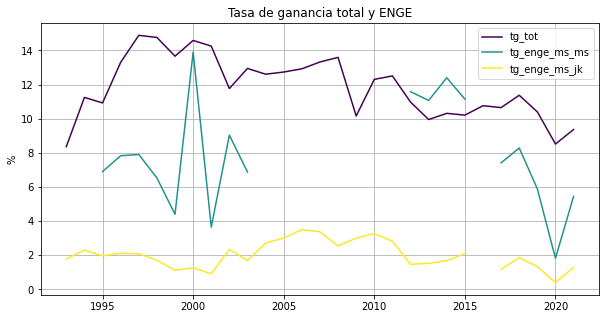

In [15]:
plot_vars(data, ['year', 'tg_tot',
                      'tg_enge_ms_ms', 'tg_enge_ms_jk', 
                      # 'tg_enge_me_ms', 'tg_enge_me_jk',  
                ], 
              'Tasa de ganancia total y ENGE', '', '%')

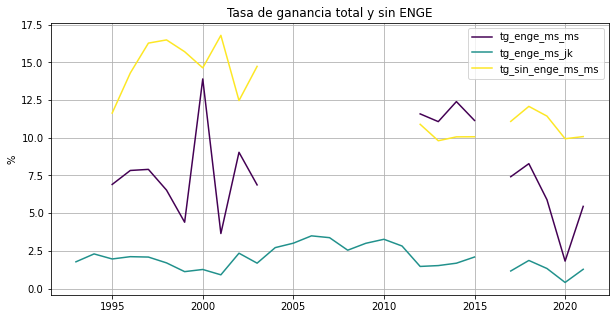

In [16]:
plot_vars(data, ['year', 
                 # 'tg_tot',
                 'tg_enge_ms_ms', 'tg_enge_ms_jk',  
                 'tg_sin_enge_ms_ms',
                 #'tg_sin_enge_ms_jk', 
                      # 'tg_sin_enge_me_ms', 'tg_sin_enge_me_jk', 
                ], 
              'Tasa de ganancia total y sin ENGE', '', '%')

In [17]:
data.to_csv('../results/enge/tg_sin_enge.csv', index= False)
tg_tot_df.to_csv('../results/enge/tg_total_calculo_depreciacion.csv', index= False)
enge_activo_neto.to_csv('../results/enge/enge_stock.csv', index= False)